# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.multioutput import MultiOutputClassifier
import joblib

# Load DataSet

In [2]:
movies = pd.read_csv('netflix_titles.csv')

In [3]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Preprocessing

In [5]:
# Drop Null Values
movies=movies.dropna().reset_index(drop=True)

In [6]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
#Identify the unique values
dict = {}
for i in list(movies.columns):
    dict[i] = movies[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())

              Unique counts
show_id                5332
type                      2
title                  5332
director               3945
cast                   5200
country                 604
date_added             1453
release_year             72
rating                   14
duration                198
listed_in               335
description            5321


In [8]:
#Identify the missing values

temp = movies.isnull().sum()
uniq = pd.DataFrame({'Columns': temp.index, 'Missing values': temp.values})
uniq

,Columns,Missing values
0,show_id,0
1,type,0
2,title,0
3,director,0
4,cast,0
5,country,0
6,date_added,0
7,release_year,0
8,rating,0
9,duration,0


# EDA

# Analysis of Movies vs TV Shows

In [9]:
netflix_shows=movies[movies['type']=='TV Show']
netflix_movies=movies[movies['type']=='Movie']

In [10]:
netflix_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
92,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
120,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
121,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
131,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4880,s8173,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015,TV-Y7,1 Season,"Kids' TV, TV Comedies","A hungry fox and three resourceful, surprising..."
4906,s8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...
4969,s8294,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,"March 31, 2017",2012,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Richie Beckett is an aging Brighton crime boss...
4977,s8303,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",2016,TV-MA,1 Season,"British TV Shows, Crime TV Shows, TV Dramas",Twenty years after 5-year-old Jesse disappears...


In [11]:
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
5,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Text(0.5, 1.0, 'TV Shows VS Movies')

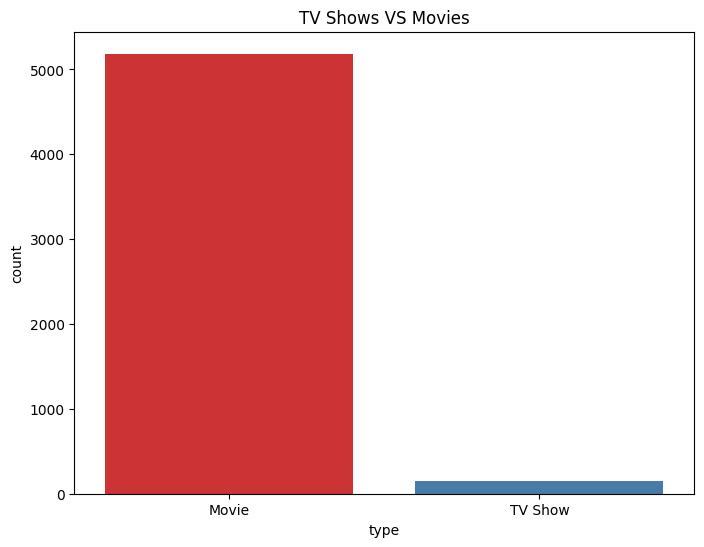

In [12]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x = "type", data = movies,palette="Set1")
ax.set_title("TV Shows VS Movies")

This shows that there are more Movies than TV Shows on Netflix

# Movie Ratings Analysis

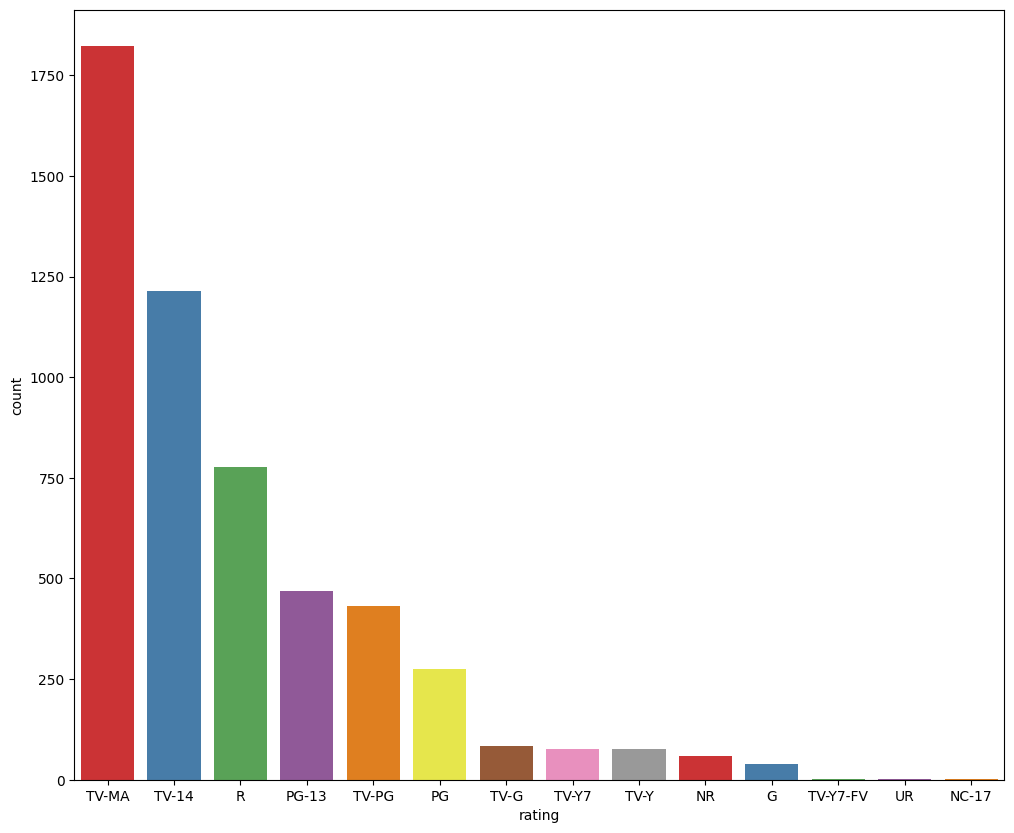

In [13]:
#Movie Rating
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=movies,palette="Set1",order=movies['rating'].value_counts().index[0:15]) 

Most number of movies are made with the 'TV-MA' rating. This rating is assiged to a television program that is designed for mature audiences only.
Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

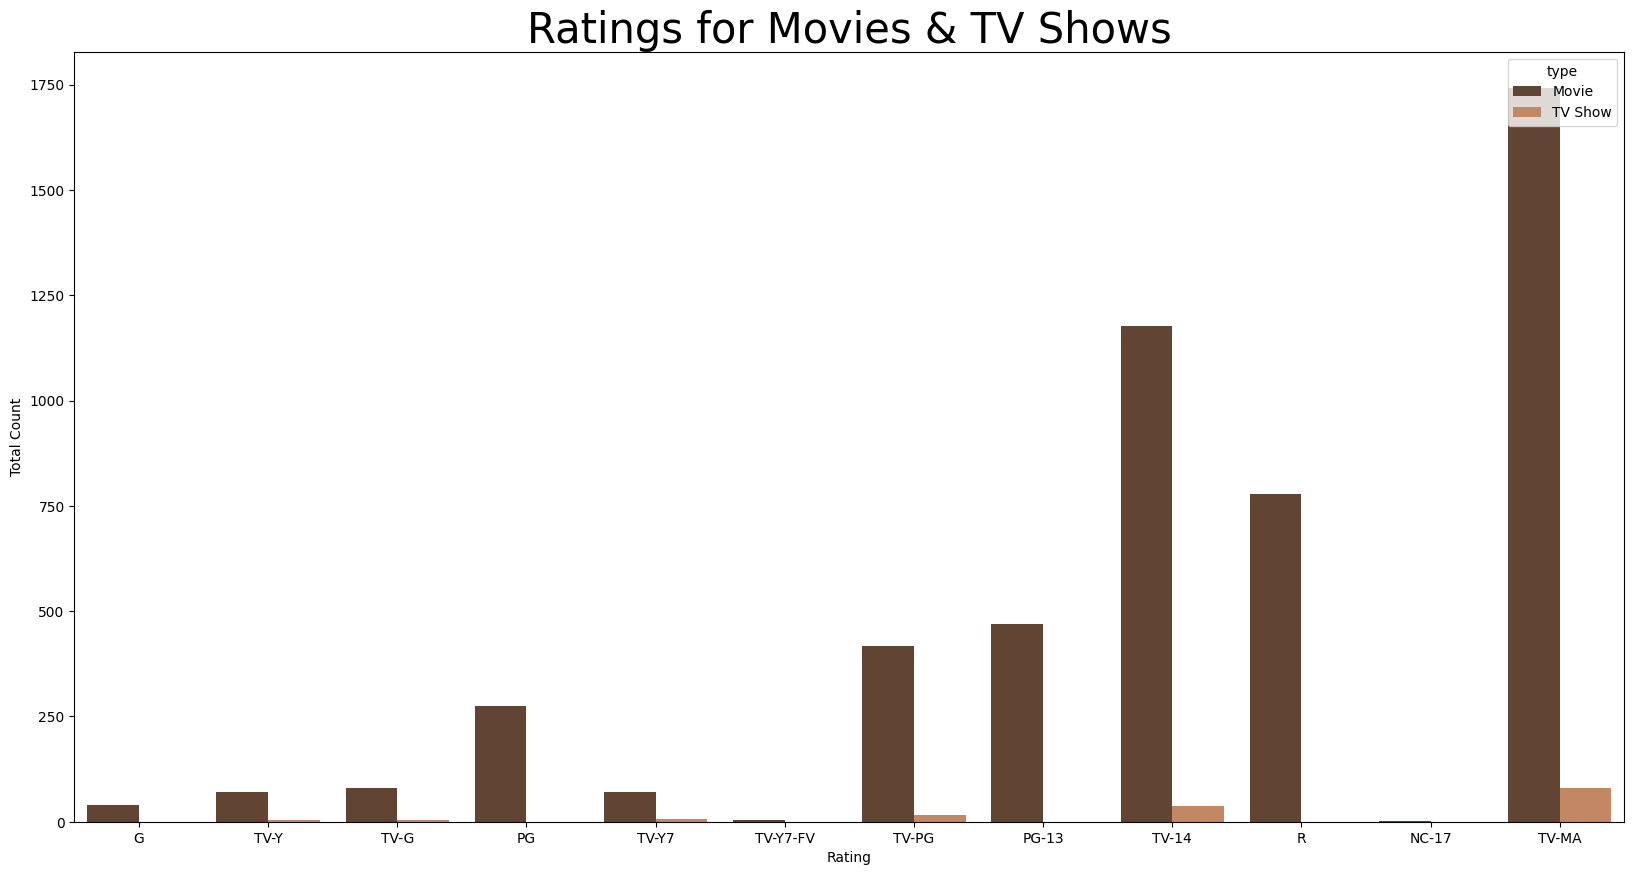

In [14]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(20,10))
g = sns.countplot(movies.rating, hue=movies.type, order=order, palette="copper");
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

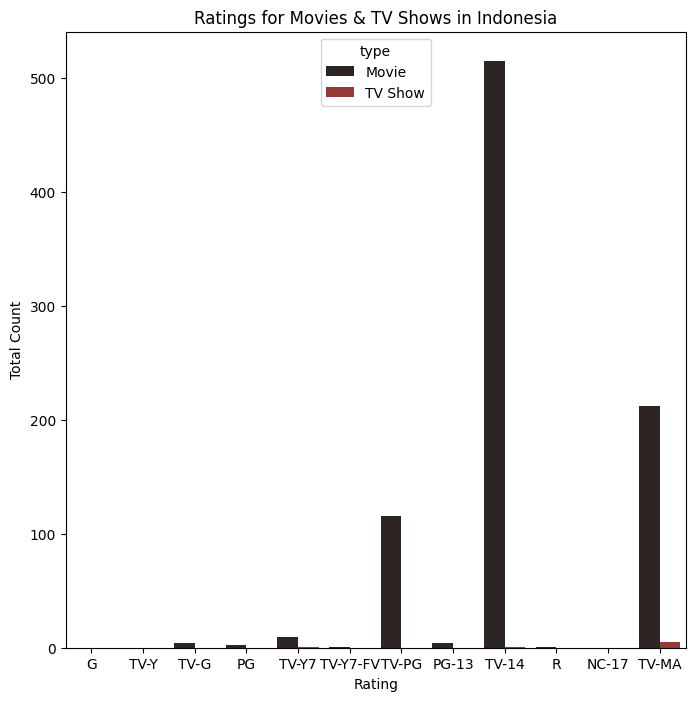

In [15]:
IND = movies[movies.country == "India"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(IND.rating, hue=IND.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in Indonesia")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

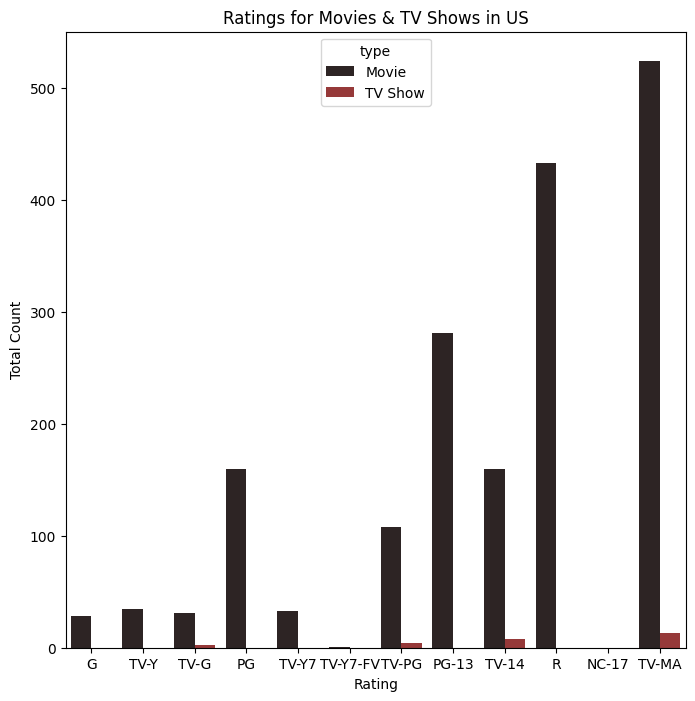

In [16]:
US = movies[movies.country == "United States"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8,8))
g = sns.countplot(US.rating, hue=US.type, order=order, palette="dark:brown");
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

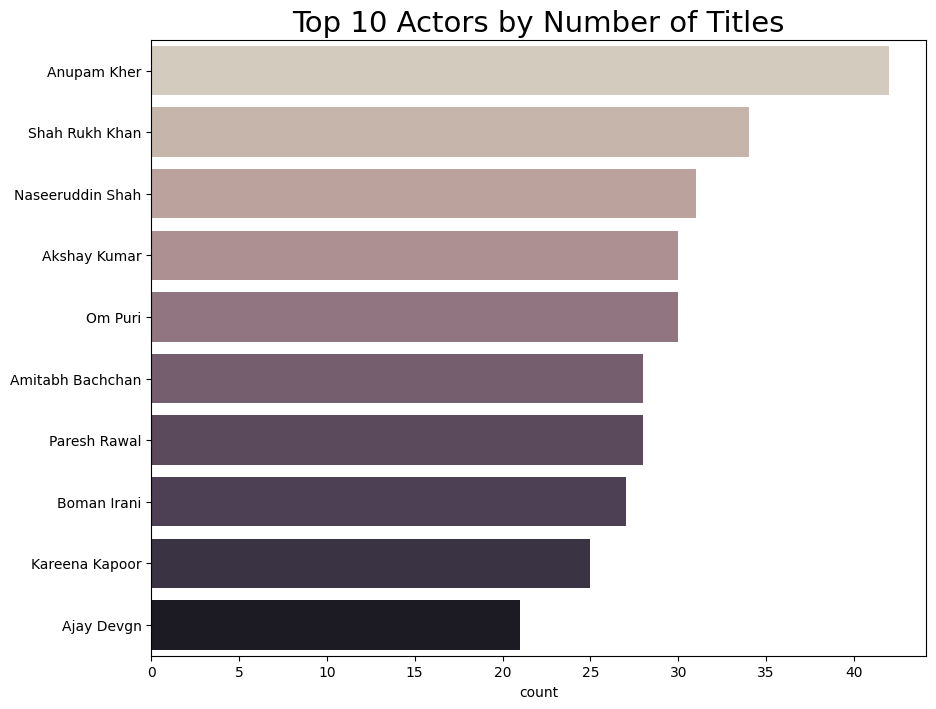

In [17]:
plt.figure(figsize=(10,8))
netflix_cast = movies[movies.cast != 'cast unavailable'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = netflix_cast, order=netflix_cast.value_counts().index[:10], palette='magma_r', saturation=.2)
plt.title('Top 10 Actors by Number of Titles', fontsize=21);
plt.show()

In [18]:
#Analysing IMDB ratings to get top rated movies on Netflix
imdb_ratings=pd.read_csv("IMDb ratings.csv", usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)

In [19]:
imdb_ratings.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [20]:
imdb_titles.head()

,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [21]:
#joining netflix dataset and imdb dataset
ratings.dropna()
joint_data=ratings.merge(movies,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [22]:
joint_data

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
833,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
321,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
310,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1134,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","August 1, 2021",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...
515,Koshish,1972,8.6,Drama,s7225,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,"December 31, 2019",1972,TV-14,115 min,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Ride or Die,2005,1.7,"Action, Western",s1051,Movie,Ride or Die,Ryuichi Hiroki,"Kiko Mizuhara, Honami Sato, Yoko Maki, Anne Su...",Japan,"April 15, 2021",2021,TV-MA,143 min,"Dramas, International Movies, LGBTQ Movies",Rei helps the woman she’s been in love with fo...
496,Himmatwala,2013,1.7,"Action, Comedy",s4443,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...
1509,Welcome to New York,2018,1.6,"Comedy, Drama",s8716,Movie,Welcome to New York,Abel Ferrara,"Gérard Depardieu, Jacqueline Bisset, Marie Mou...","United States, France","March 23, 2017",2014,R,108 min,"Dramas, Independent Movies",A lecherous World Bank official sees his reput...
1040,Pink,2016,1.6,"Comedy, Drama",s5630,Movie,Pink,Aniruddha Roy Chowdhury,"Tapsee Pannu, Kirti Kulhari, Andrea Tariang, A...",India,"January 20, 2017",2016,TV-14,130 min,"Dramas, International Movies","A sexual assault victim, unjustly tried for th..."


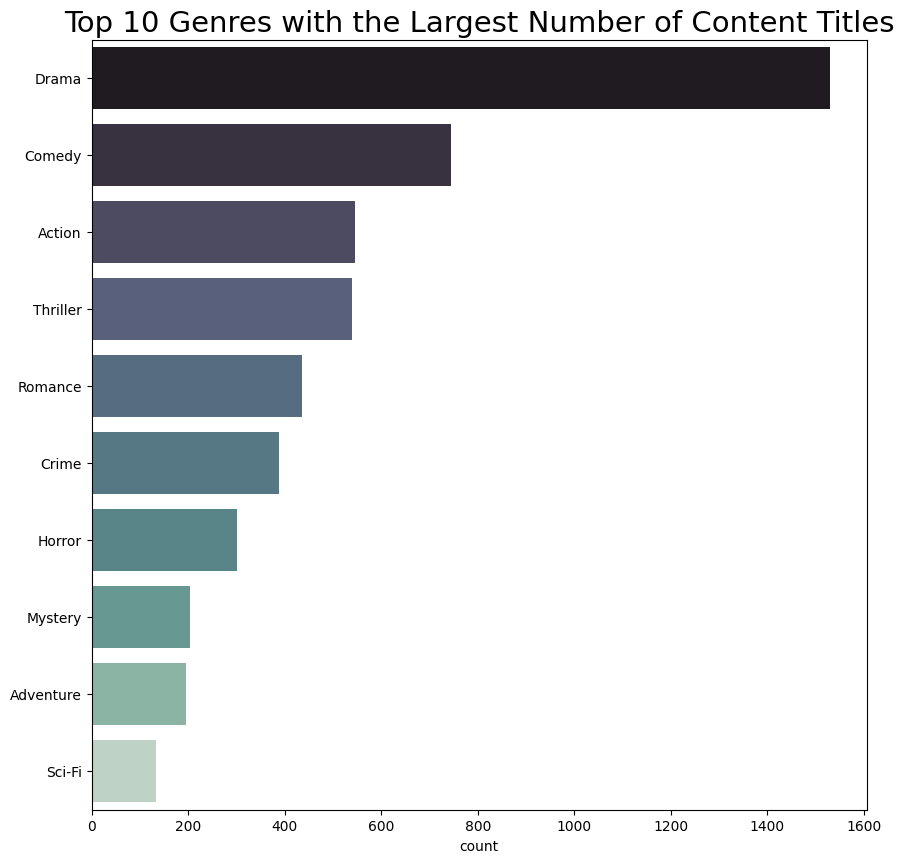

In [23]:
top_genres = joint_data.set_index('title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='mako', saturation=.4)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21);

# Top content creating countries

In [24]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame({'Country': country_count.index, 'Shows': country_count.values})
topcountries=country_count[0:11]
topcountries

,Country,Shows
0,United States,774
1,India,704
2,United Kingdom,64
3,Philippines,50
4,Canada,46
5,Indonesia,38
6,Spain,35
7,Nigeria,31
8,"United Kingdom, United States",29
9,France,25


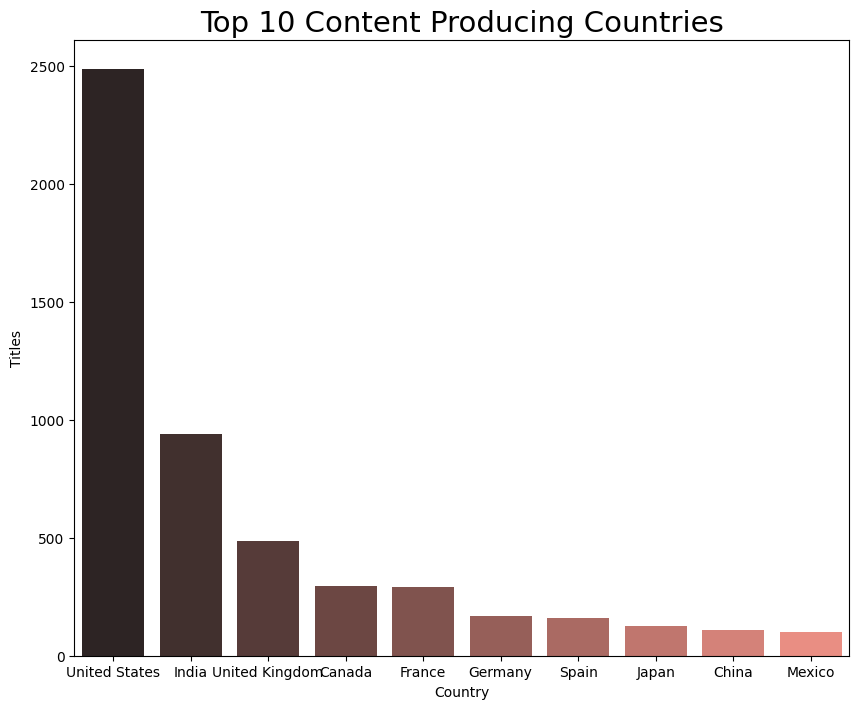

In [25]:
Countries = movies.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
Countries = Countries[Countries != 'production country unavailable']
plt.figure(figsize=(10,8))
g = sns.countplot(x = Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('Top 10 Content Producing Countries', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()

# Year wise analysis

In [26]:
Last_fifteen_years = movies[movies['release_year']>2005]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
5,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
6,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


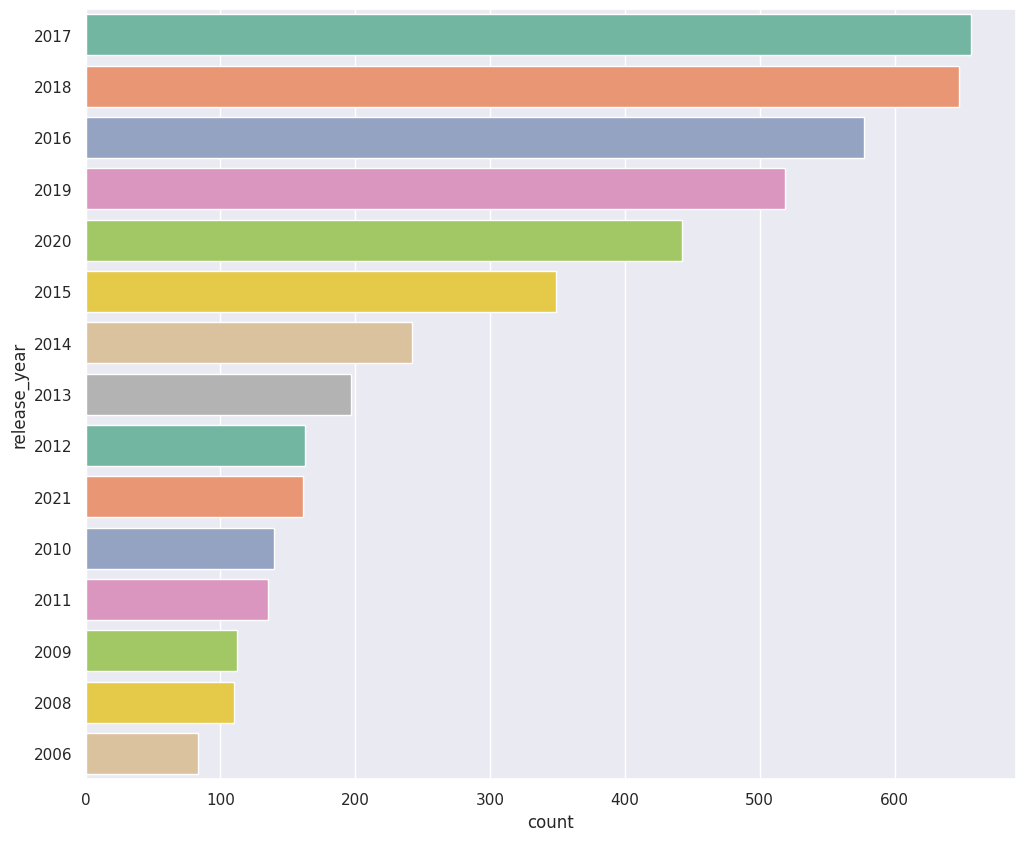

In [27]:
#Year wise analysis in graph
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set2", order=movies['release_year'].value_counts().index[0:15])

# Analysis of duration of movies

In [28]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

0       125
2       104
3       127
4       166
5       103
       ... 
5327     96
5328    158
5329     88
5330     88
5331    111
Name: duration, Length: 5185, dtype: int64

In [29]:
netflix_movies.shape

(5185, 12)

In [30]:
netflix_shows.shape

(147, 12)

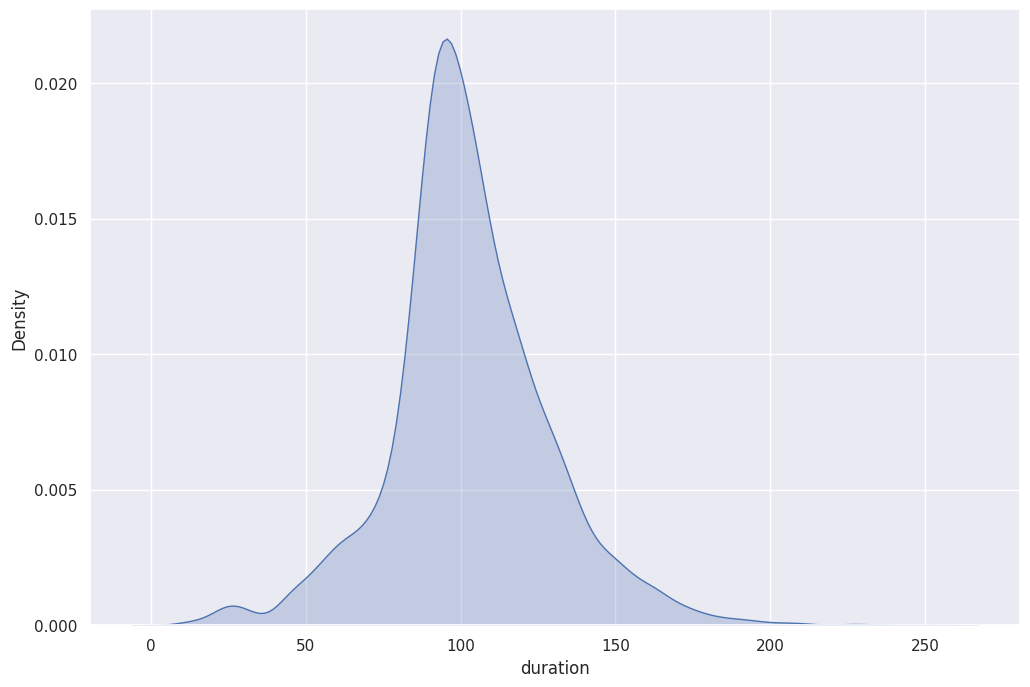

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

# Analysis of duration of TV shows

In [32]:
features=['title','duration']
durations= netflix_shows[features]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

In [33]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [34]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<AxesSubplot: xlabel='title'>

<Figure size 1000x800 with 0 Axes>

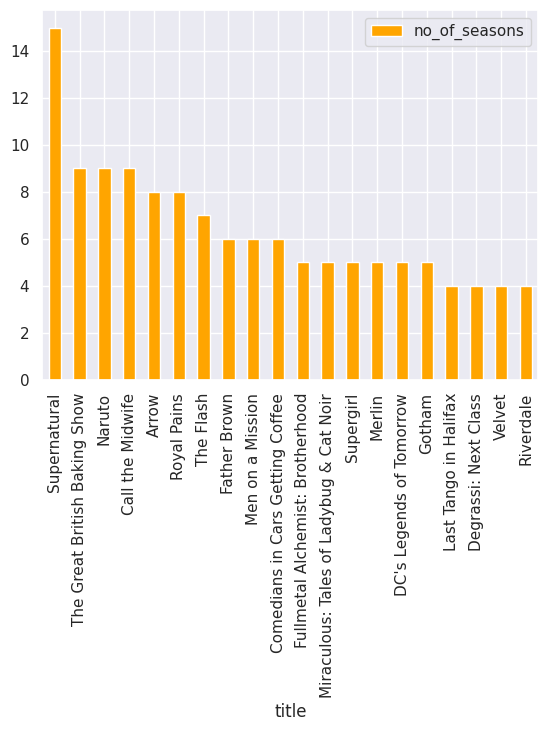

In [35]:
top20=top[0:20]
plt.figure(figsize=(10,8))
top20.plot(kind='bar',x='title',y='no_of_seasons', color='orange')

In [36]:
# filtered_directors = netflix_df[netflix_df.director != 'No_Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)plt.figure(figsize=(13,7))plt.title('Top 10 Director Based on The Number of Titles')
# sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
# plt.show()

# Content Based Recommendations

In [37]:
#Plot description based Recommender

movies['description'].head()

0    On a photo shoot in Ghana, an American model s...
1    A talented batch of amateur bakers face off in...
2    A woman adjusting to life after a loss contend...
3    After most of her family is murdered in a terr...
4    When the father of the man she loves insists t...
Name: description, dtype: object

This will give us a matrix where each column represents a word in the description vocabulary 
(all the words that appear in at least one document) and each row represents a movie, as before. 
This is done to reduce the importance of words that occur frequently in plot descriptions and therefore, 
their significance in computing the final similarity score

In [38]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a', etc.
tfidf = TfidfVectorizer(stop_words='english')

#Replacing NaN with an empty string
movies['description'] = movies['description'].fillna('')

#Constructing the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5332, 14298)

This means there are 14,298 different words describing the 5332 movies in our dataset.

This matric score will be used to genrate similarity score and to calculate that we will use cosine similatiry

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.

Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [39]:
#tfidf_matrix.nonzero()
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [40]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03618611],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.06198003, 0.01775014,
        0.0446703 ],
       ...,
       [0.        , 0.        , 0.06198003, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01775014, ..., 0.        , 1.        ,
        0.        ],
       [0.03618611, 0.        , 0.0446703 , ..., 0.        , 0.        ,
        1.        ]])

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. 
Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. 
In other words, we need a mechanism to identify the index of a movie in our netflix DataFrame, given its title

In [41]:
#construct a reverse map if indices and mivie titles
indices = pd.Series(movies.index, index = movies['title']).drop_duplicates()

In [42]:
# Given every movies or show an index number
indices

title
Sankofa                             0
The Great British Baking Show       1
The Starling                        2
Je Suis Karl                        3
Jeans                               4
                                 ... 
Zinzana                          5327
Zodiac                           5328
Zombieland                       5329
Zoom                             5330
Zubaan                           5331
Length: 5332, dtype: int64

# Defining our recommendation system

In [43]:
# Function that takes in movie title as input and outputs most similar movies
# we will use cosine similarity instead of Euclidian distance. because what will be used for calculation is the angle between the vectors 
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [44]:
get_recommendations('Black Panther')

110                                 The November Man
1374                                      John Henry
3648                                            Cake
3762                           Daughters of the Dust
4890                         The Angry Birds Movie 2
21      Naruto Shippûden the Movie: The Will of Fire
2598           The Legacy of a Whitetail Deer Hunter
4033                                             Her
1274                                     Da 5 Bloods
2377                           Christmas With A View
Name: title, dtype: object

In [45]:
get_recommendations('3 Idiots')

2678                                Candy Jar
116                                    Pahuna
1463                              Moms at War
3011                                 Lovesong
422                           Never Back Down
549                               A Week Away
5089                          The Prince & Me
3539                     Barrio Universitario
2686                                     Dude
1210    Hunter in the Blue Side of Manchester
Name: title, dtype: object

Therefore, more metrics should be added to the model to improve performance.

Content based filtering on multiple metrics Content based filtering on the following factors:

1 Title
2 Cast
3 Director
4 Listed in
5 Plot

In [46]:
#Filling null values with empty string.
filledna=movies.fillna('')

In [47]:
filledna

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Now we need to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Tony of "Tony Stark" and "Tony Anthony" as the same

In [48]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [49]:
# movies['director'].apply(lambda x:[i.replace(" ","") for i in x]) and rest we can do the same for all the other features

In [50]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [51]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna

,title,director,cast,listed_in,description
0,sankofa,hailegerima,"kofighanaba,oyafunmikeogunlano,alexandraduah,n...","dramas,independentmovies,internationalmovies","onaphotoshootinghana,anamericanmodelslipsbacki..."
1,thegreatbritishbakingshow,andydevonshire,"melgiedroyc,sueperkins,maryberry,paulhollywood","britishtvshows,realitytv",atalentedbatchofamateurbakersfaceoffina10-week...
2,thestarling,theodoremelfi,"melissamccarthy,chriso'dowd,kevinkline,timothy...","comedies,dramas",awomanadjustingtolifeafteralosscontendswithafe...
3,jesuiskarl,christianschwochow,"lunawedler,jannisniewöhner,milanpeschel,edinha...","dramas,internationalmovies",aftermostofherfamilyismurderedinaterroristbomb...
4,jeans,s.shankar,"prashanth,aishwaryaraibachchan,srilakshmi,nassar","comedies,internationalmovies,romanticmovies",whenthefatherofthemanshelovesinsiststhathistwi...
...,...,...,...,...,...
5327,zinzana,majidalansari,"alisuliman,salehbakri,yasa,alial-jabri,mansoor...","dramas,internationalmovies,thrillers",recoveringalcoholictalalwakesupinsideasmall-to...
5328,zodiac,davidfincher,"markruffalo,jakegyllenhaal,robertdowneyjr.,ant...","cultmovies,dramas,thrillers","apoliticalcartoonist,acrimereporterandapairofc..."
5329,zombieland,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","comedies,horrormovies","lookingtosurviveinaworldtakenoverbyzombies,ado..."
5330,zoom,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","children&familymovies,comedies","draggedfromcivilianlife,aformersuperheromusttr..."


Here we can see all the words are joined to make a big string.

which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [52]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

In [53]:
filledna['soup'][1:11]

1     thegreatbritishbakingshow andydevonshire melgi...
2     thestarling theodoremelfi melissamccarthy,chri...
3     jesuiskarl christianschwochow lunawedler,janni...
4     jeans s.shankar prashanth,aishwaryaraibachchan...
5     grownups dennisdugan adamsandler,kevinjames,ch...
6     darkskies scottstewart kerirussell,joshhamilto...
7     paranoia robertluketic liamhemsworth,garyoldma...
8     birthofthedragon georgenolfi billymagnussen,ro...
9     jaws stevenspielberg royscheider,robertshaw,ri...
10    jaws2 jeannotszwarc royscheider,lorrainegary,m...
Name: soup, dtype: object

The next steps are the same as what we did with our plot description based recommender.

One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

other techniques are 
1. Bag of words 
2. TF-IDF
3. word to wac 

In [54]:
# TAGS creation

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Remove Stop-words
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [55]:
# Given every movies or show an index number
indices

title
sankofa                         0
thegreatbritishbakingshow       1
thestarling                     2
jesuiskarl                      3
jeans                           4
                             ... 
zinzana                      5327
zodiac                       5328
zombieland                   5329
zoom                         5330
zubaan                       5331
Length: 5332, dtype: int64

In [56]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [57]:
get_recommendations_new('Welcome', cosine_sim2)

4871            Tees Maar Khan
5117             The Shaukeens
2380        Dhoondte Reh Jaoge
2568                     Joker
4077    Humko Deewana Kar Gaye
2576                 Thank You
3427                   Aitraaz
964            Phir Hera Pheri
2495                      Race
4327     Maine Pyaar Kyun Kiya
Name: title, dtype: object

In [58]:
get_recommendations_new('Black Panther', cosine_sim2)

54                   Green Lantern
2593                   How It Ends
334              Battlefield Earth
4119                      Inkheart
428               The Darkest Hour
4771                   Singularity
3789    Di Renjie zhi Sidatianwang
4000       Halo: The Fall of Reach
4464                          Next
5124          The Space Between Us
Name: title, dtype: object

In [59]:
get_recommendations_new('Andhadhun', cosine_sim2)

2540       Bareilly Ki Barfi
2556    Brij Mohan Amar Rahe
3672         Chal Dhar Pakad
2136              Bombairiya
4545          Papa the Great
1084                 Soldier
2305               Kita Kita
3486                Arisan 2
4130             Irada Pakka
505                  Mandela
Name: title, dtype: object

In [60]:
# Text Classifier Product/System:
# --Title + Rating  
# -- Desc + Rating 

In [61]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [62]:
movies['rating'].unique()

array(['TV-MA', 'TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot: xlabel='rating', ylabel='count'>

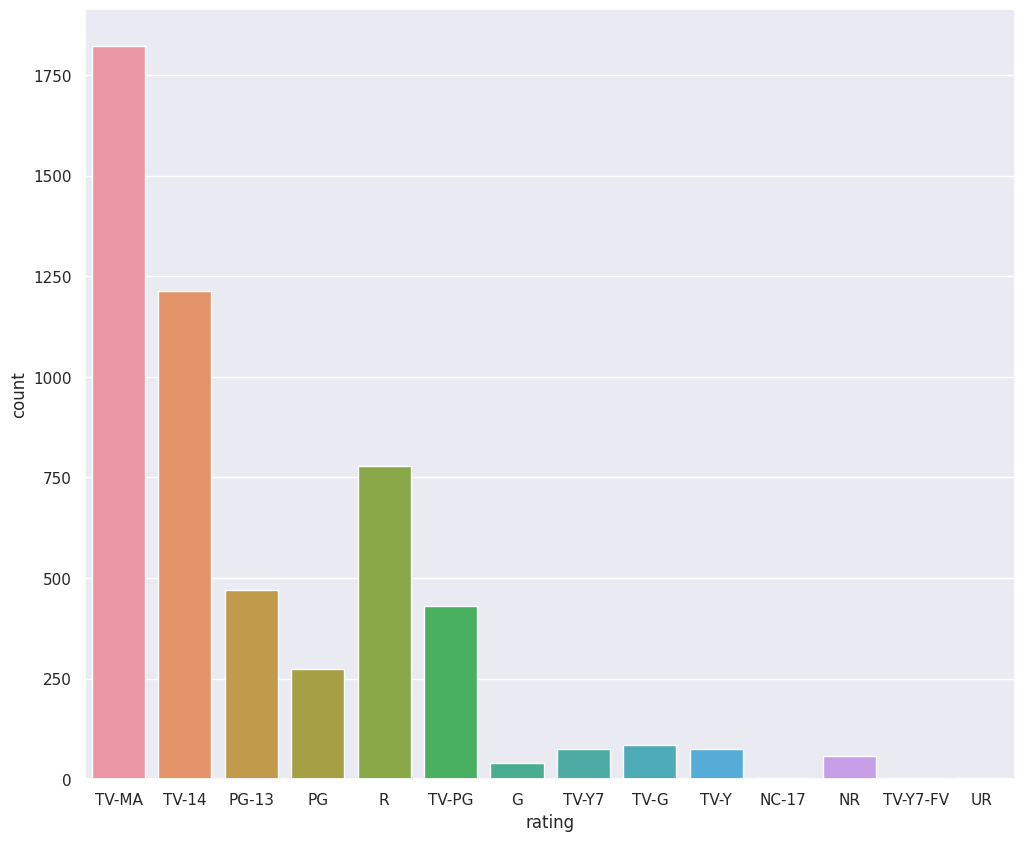

In [63]:
plt.figure(figsize=(12,10))
sns.countplot(x='rating',data=movies)

In [64]:
# Pipeline Approach 

In [65]:
# Features & Labels
X_features = movies['title'] # titles of the movies and tv shows
y_labels = movies[['type','rating']] # type of the movies and tv shows and their ratings too

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_labels,test_size =0.3,random_state=42)

In [67]:
# Multi-Label Text Classifier Product/System:
# Title + Listed In
# Desc + Listed In

In [68]:
# Pipeline for the Logistic Regression by using multipleoutputclassifier
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',MultiOutputClassifier(LogisticRegression()))])

# Pipeline for the Naive Bayes by using multipleoutputclassifier and for quick predictions
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('nb',MultiOutputClassifier(MultinomialNB()))])

In [69]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [70]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [71]:
# visualize pipeline 
from sklearn import set_config
set_config(display='diagram')

In [72]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [73]:
pipe_lr.steps

[('cv', CountVectorizer()),
 ('lr', MultiOutputClassifier(estimator=LogisticRegression()))]

In [74]:
# get paramns
pipe_lr.get_params()

{'memory': None,
 'steps': [('cv', CountVectorizer()),
  ('lr', MultiOutputClassifier(estimator=LogisticRegression()))],
 'verbose': False,
 'cv': CountVectorizer(),
 'lr': MultiOutputClassifier(estimator=LogisticRegression()),
 'cv__analyzer': 'word',
 'cv__binary': False,
 'cv__decode_error': 'strict',
 'cv__dtype': numpy.int64,
 'cv__encoding': 'utf-8',
 'cv__input': 'content',
 'cv__lowercase': True,
 'cv__max_df': 1.0,
 'cv__max_features': None,
 'cv__min_df': 1,
 'cv__ngram_range': (1, 1),
 'cv__preprocessor': None,
 'cv__stop_words': None,
 'cv__strip_accents': None,
 'cv__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cv__tokenizer': None,
 'cv__vocabulary': None,
 'lr__estimator__C': 1.0,
 'lr__estimator__class_weight': None,
 'lr__estimator__dual': False,
 'lr__estimator__fit_intercept': True,
 'lr__estimator__intercept_scaling': 1,
 'lr__estimator__l1_ratio': None,
 'lr__estimator__max_iter': 100,
 'lr__estimator__multi_class': 'auto',
 'lr__estimator__n_jobs': None,
 'lr__estimator

In [75]:
X_train.shape

(3732,)

In [76]:
y_train.shape

(3732, 2)

In [77]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', MultiOutputClassifier(estimator=LogisticRegression()))])

In [78]:
# Accuracy
pipe_lr.score(X_test,y_test)

0.33125

In [79]:
X_test

1181                           Aiyyaa
5001    The Haunting of Molly Hartley
4586            Postcards from London
1321                           Ne Zha
168             The Edge of Seventeen
                    ...              
3576                         Big Kill
1383                      Arctic Dogs
3963                       God of War
4590                  Premachi Goshta
4328                  Maine Pyar Kiya
Name: title, Length: 1600, dtype: object

In [80]:
# Make a prediction of the rating 
# Sample Prediction
print(X_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

Aiyyaa
Actual Prediction: type      Movie
rating    TV-14
Name: 1181, dtype: object


In [81]:
ex1 = X_test.iloc[0]

In [82]:
ex1

'Aiyyaa'

In [83]:
pipe_lr.predict([ex1])

array([['Movie', 'TV-MA']], dtype=object)

In [84]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype=object), array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)]


[array([[0.97640894, 0.02359106]]),
 array([[4.75909118e-03, 2.90298198e-05, 1.14840647e-02, 4.23004186e-02,
         8.43650123e-02, 1.41139314e-01, 2.51586225e-01, 1.16043246e-02,
         3.58566055e-01, 7.54326577e-02, 7.72715903e-03, 1.01460735e-02,
         3.02031277e-05, 8.30371275e-04]])]

In [85]:
pipe_nb

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [86]:
pipe_nb.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('nb', MultiOutputClassifier(estimator=MultinomialNB()))])

In [87]:
# Accuracy
pipe_nb.score(X_test,y_test)

0.333125

In [88]:
# Make a prediction of the rating 
# Sample Prediction
print(X_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

Aiyyaa
Actual Prediction: type      Movie
rating    TV-14
Name: 1181, dtype: object


In [89]:
ex1_2 = X_test.iloc[0]

In [90]:
ex1_2

'Aiyyaa'

In [91]:
pipe_nb.predict([ex1_2])

array([['Movie', 'TV-MA']], dtype='<U8')

In [92]:
# Prediction Prob
print(pipe_nb.classes_)
pipe_nb.predict_proba([ex1_2])

[array(['Movie', 'TV Show'], dtype='<U7'), array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype='<U8')]


[array([[0.97293676, 0.02706324]]),
 array([[6.43086817e-03, 2.67952840e-04, 1.01822079e-02, 4.98392283e-02,
         8.81564845e-02, 1.43354770e-01, 2.27759914e-01, 1.63451233e-02,
         3.42175777e-01, 8.60128617e-02, 1.44694534e-02, 1.42015005e-02,
         2.67952840e-04, 5.35905681e-04]])]

In [93]:
# joblib.dump(pipe_lr,pipe_lr_cv_title_type_prediction_model.pkl)
# joblib.dump(pipe_lr,pipe_lr_cv_type_desc_prediction_model.pkl)
# joblib.dump(pipe_lr,pipe_nb_desc_rating_model.pkl)